<h2 style="text-align:center">Proyecto 2</h2>

### **Integrantes**:

Daniela Donado <br>
Carmen Samaniego<br>
Sofia Marcano<br>


***

### Importaciones

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split, validation_curve, learning_curve
from scipy.stats import jarque_bera, zscore
import statsmodels.api as sm 
from statsmodels.stats.stattools import durbin_watson 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay, precision_recall_curve, roc_curve
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


***

# Parte 1. Regresión (50%)

Carga del archivo

In [68]:
data = pd.read_csv("FLIR_groups1and2.csv", skiprows=2, delimiter=";")
data.drop(columns=['SubjectID', 'Gender', 'Ethnicity', 'Cosmetics', 'Time', 'Date', 'Age'], inplace=True)

Realizamos un promedio de las variables numéricas para las 4 rondas y lo guardamos en un nuevo dataframe. 

In [69]:
variables_rondas = {}

for col in data.columns:
    if col.endswith("_1") or col.endswith("_2") or col.endswith("_3") or col.endswith("_4"):
        base = col[:-2]  
        variables_rondas.setdefault(base, []).append(col)
    
    elif col[-1] in ["1", "2", "3", "4"] and col[-2] != "_":
        base = col[:-1] 
        variables_rondas.setdefault(base, []).append(col)
 
df_prom = pd.DataFrame()

for base, cols in variables_rondas.items():
    df_prom[base + "_avg"] = data[cols].mean(axis=1)

print("Variables promediadas encontradas:", len(df_prom.columns))
df_prom

Variables promediadas encontradas: 30


,Unnamed: _avg,T_offset_avg,Max1R13_avg,Max1L13_avg,aveAllR13_avg,aveAllL13_avg,T_RC_avg,T_RC_Dry_avg,T_RC_Wet_avg,T_RC_Max_avg,...,T_FHLC_avg,T_FHBC_avg,T_FHTC_avg,T_FH_Max_avg,T_FHC_Max_avg,T_Max_avg,T_OR_avg,T_OR_Max_avg,T_LC1_avg,Unnamed: 11_avg
0,NaN,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,34.7625,35.0325,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,35.39,NaN
1,NaN,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,34.55,NaN
2,NaN,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,35.60,NaN
3,NaN,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,35.68,NaN
4,NaN,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,35.69,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,NaN,1.2225,35.6425,35.6525,34.8575,35.0050,35.7525,35.6575,35.7375,35.7750,...,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,35.84,NaN
1016,NaN,1.4675,35.9825,35.7575,35.4275,35.1975,35.9700,35.9500,35.8625,36.0075,...,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,35.78,NaN
1017,NaN,0.1300,36.4075,36.3400,35.8700,35.9600,36.4100,36.3625,36.3650,36.4475,...,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,36.43,NaN
1018,NaN,1.2450,35.8150,35.5250,34.2950,34.0100,35.7700,35.6850,35.7550,35.8150,...,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,NaN,NaN


Añade las variales aveOralF y aveOralM pues estas son las posibles variables de interés

In [70]:
for col in ["aveOralF", "aveOralM"]:
    if col in data.columns:
        df_prom[col] = data[col]

Se eliminan columnas con NaN

In [71]:
df_prom_limpio = df_prom.dropna(axis=1, how='all')  
df_prom_limpio = df_prom_limpio.dropna()            
df_prom_limpio

,T_offset_avg,Max1R13_avg,Max1L13_avg,aveAllR13_avg,aveAllL13_avg,T_RC_avg,T_RC_Dry_avg,T_RC_Wet_avg,T_RC_Max_avg,T_LC_avg,...,T_FHBC_avg,T_FHTC_avg,T_FH_Max_avg,T_FHC_Max_avg,T_Max_avg,T_OR_avg,T_OR_Max_avg,T_LC1_avg,aveOralF,aveOralM
0,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,34.7625,35.0325,35.320000,...,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,35.39,36.85,36.59
1,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,34.563333,...,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,34.55,37.00,37.19
2,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,35.470000,...,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,35.60,37.20,37.34
3,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,35.566667,...,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,35.68,36.85,37.09
4,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,35.623333,...,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,35.69,36.80,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1.1775,36.1125,36.1150,35.1200,35.3750,36.1100,36.0875,36.0750,36.1450,36.110000,...,34.9950,35.3700,35.9300,35.9300,36.4375,36.3975,36.4375,36.23,36.95,36.99
1015,1.2225,35.6425,35.6525,34.8575,35.0050,35.7525,35.6575,35.7375,35.7750,35.790000,...,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,35.84,36.95,36.99
1016,1.4675,35.9825,35.7575,35.4275,35.1975,35.9700,35.9500,35.8625,36.0075,35.840000,...,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,35.78,37.25,37.19
1017,0.1300,36.4075,36.3400,35.8700,35.9600,36.4100,36.3625,36.3650,36.4475,36.260000,...,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,36.43,37.35,37.59


Matriz de correlación

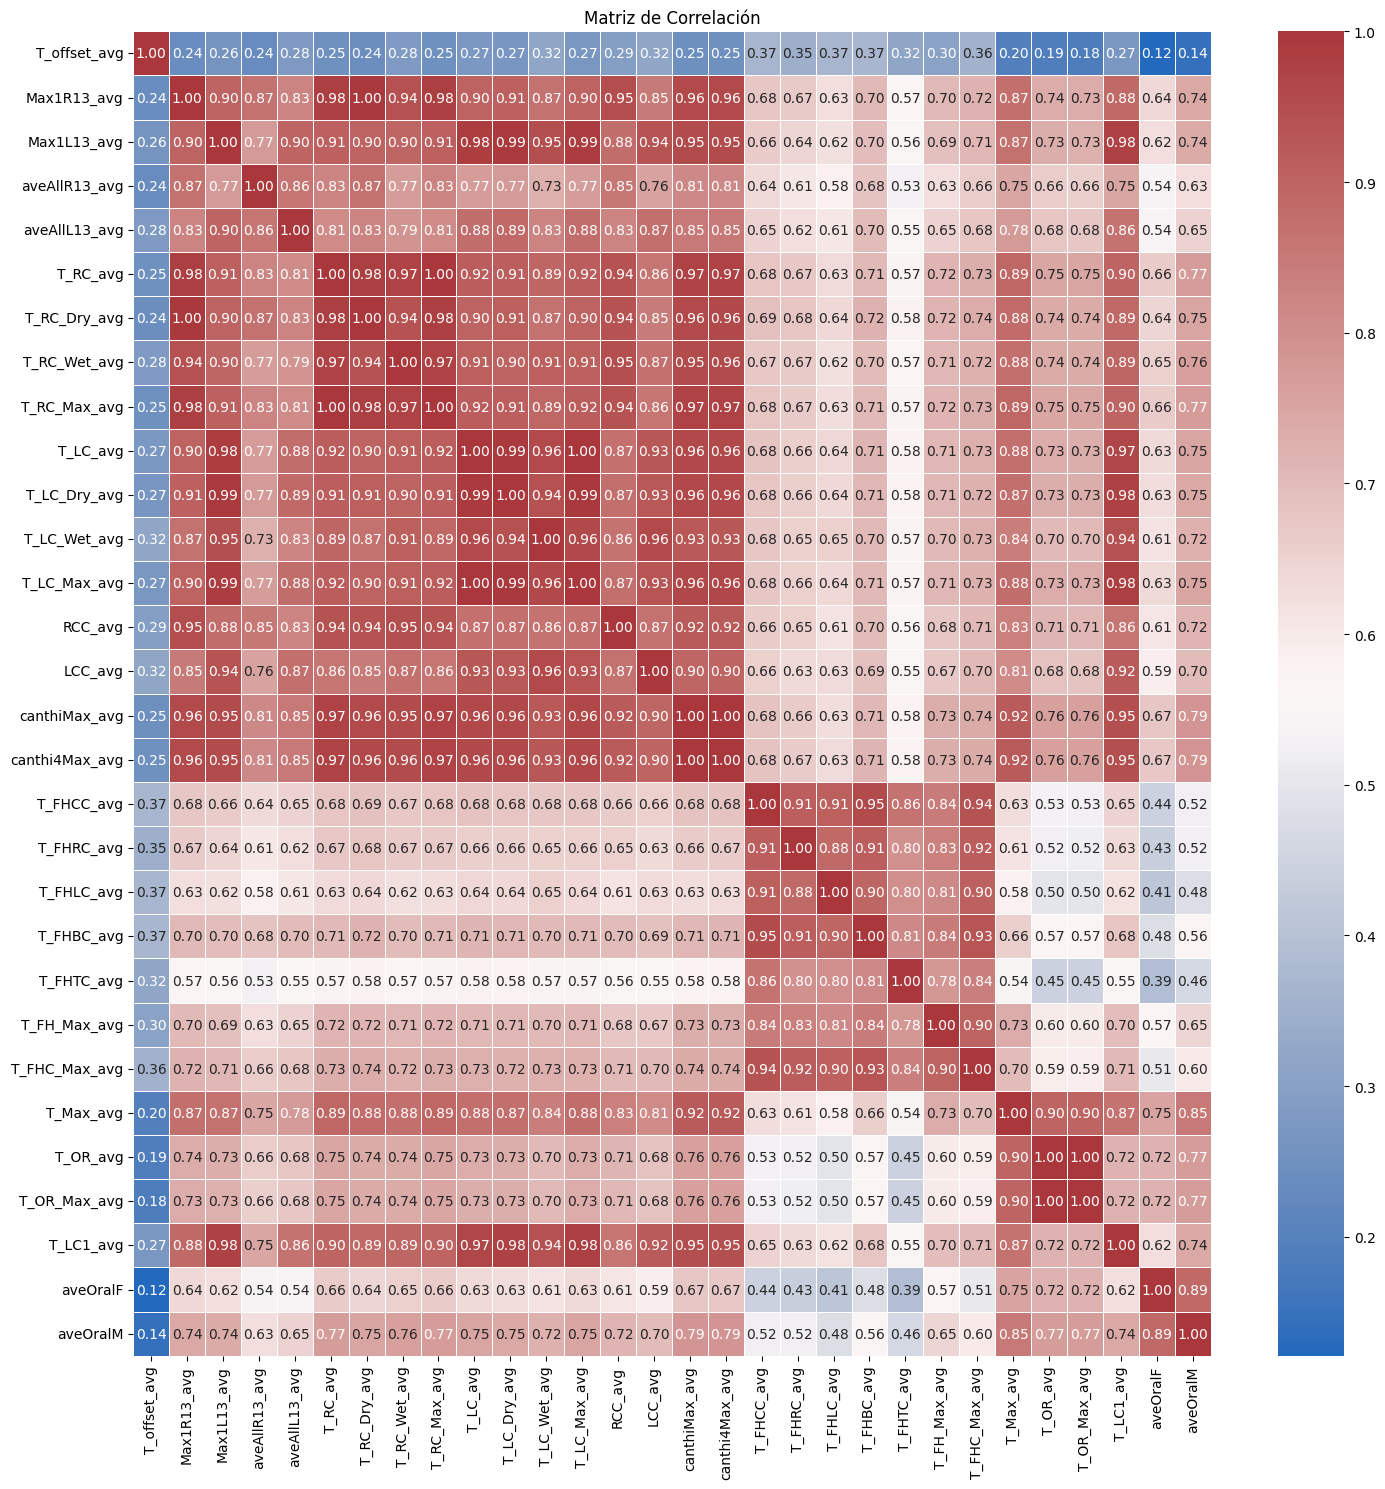

In [72]:
corr_matrix = df_prom_limpio.corr()
plt.figure(figsize=(15, 15))
plt.title("Matriz de Correlación")
sns.heatmap(abs(corr_matrix.values), cmap='vlag', fmt=".2f", linewidths=0.5,xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True)
plt.tight_layout()

Debido a que la matriz de correlación es muy grande, utilizamos el siguiente código para determinar las variables más correlacionadas con aveOralM.

Elegimos **aveOralM** ya que el modo monitor permite estabilizar la temperatura a diferencia de aveOralF, lo cual permite una mayor presición y estabilidad en los mediciones realizadas.

In [75]:
corr_oral = corr_matrix["aveOralM"].sort_values(ascending=False)

print("\n=== MEJORES VARIABLES PARA PREDECIR aveOralM ===")
print(corr_oral)


=== MEJORES VARIABLES PARA PREDECIR aveOralM ===
aveOralM          1.000000
aveOralF          0.885920
T_Max_avg         0.850979
canthiMax_avg     0.785901
canthi4Max_avg    0.785620
T_RC_Max_avg      0.770498
T_RC_avg          0.769927
T_OR_avg          0.768366
T_OR_Max_avg      0.768010
T_RC_Wet_avg      0.761592
T_LC_Max_avg      0.752367
T_RC_Dry_avg      0.750640
T_LC_avg          0.749453
T_LC_Dry_avg      0.745880
T_LC1_avg         0.744383
Max1R13_avg       0.743215
Max1L13_avg       0.737272
T_LC_Wet_avg      0.724721
RCC_avg           0.715360
LCC_avg           0.700446
aveAllL13_avg     0.647814
T_FH_Max_avg      0.646177
aveAllR13_avg     0.625166
T_FHC_Max_avg     0.600896
T_FHBC_avg        0.561345
T_FHCC_avg        0.524219
T_FHRC_avg        0.523264
T_FHLC_avg        0.478807
T_FHTC_avg        0.462322
T_offset_avg      0.142976
Name: aveOralM, dtype: float64


Seleccionamos las 4 variables predictoras.

- T_Max_avg: promedio de la máxima temperatura de toda la cara
- canthiMax_avg: promedio de la temperatura de la zona canthi
- canthi4Max_avg: promedio de la temperatura de la zona canthi en 4 pixeles
- T_RC_Max_avg: promedio de la temperatura máxima del cantus derecho

***

A cada modelo se le aplicará la regulación Lasso porque este permite eliminar coeficientes asociados a variables que no le aportan a la capacidad de predicción del modelo.

### Prueba 1: Modelo lineal múltiple sin interacciones

In [76]:
y = df_prom_limpio['aveOralM']

x = df_prom_limpio[['T_Max_avg', 'canthiMax_avg', 'canthi4Max_avg', 'T_RC_Max_avg']]

model = LinearRegression()

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores1 = cross_val_score(model, x, y, cv=kf, scoring='neg_root_mean_squared_error')
scores = cross_val_score(model, x, y, cv=kf, scoring='r2')
rmse_promedio_LS = -np.mean(scores1)
R2_promedio_LS = np.mean(scores)
print(f'Root Mean Squared Error promedio (RMSE): {rmse_promedio_LS}')
print(f'Coef. de Determinación promedio (R^2): {R2_promedio_LS}')

Root Mean Squared Error promedio (RMSE): 0.2691999170905702
Coef. de Determinación promedio (R^2): 0.6943757984764046


Regularización Lasso

In [77]:
alfa = np.logspace(-3,3,num=7)
modeloL= LassoCV(alphas=alfa,cv=5,max_iter=10000)

scores1L = cross_val_score(modeloL, x, y, cv=kf, scoring='neg_root_mean_squared_error')
scoresL = cross_val_score(modeloL, x, y, cv=kf, scoring='r2')  

rmse_promedio_LSL = -np.mean(scores1L) 
R2_promedio_LSL = np.mean(scoresL) 

print("Regularización Lasso")
print(f'Root Mean Squared Error promedio (RMSE) Lasso: {rmse_promedio_LSL}')
print(f'Coef. de Determinación promedio (R^2) Lasso:{R2_promedio_LSL}')
modeloL.fit(x, y)
print("-"*20)
print("Coeficientes Lasso:", modeloL.coef_)

Regularización Lasso
Root Mean Squared Error promedio (RMSE) Lasso: 0.26892958918328663
Coef. de Determinación promedio (R^2) Lasso:0.6951721761921725
--------------------
Coeficientes Lasso: [0.83435927 0.         0.         0.04701907]


### Prueba 2: Modelo lineal múltiple con interacciones

Definir el mejor grado

El mejor orden del polinomio es: 4


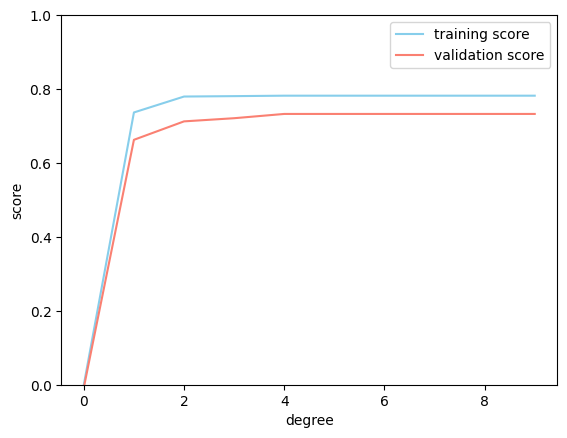

In [78]:
degree = np.arange(0, 10)

train_score, val_score = validation_curve(
    make_pipeline(PolynomialFeatures(degree, interaction_only=True),LinearRegression()), x, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=5)

plt.plot(degree, np.median(train_score, axis=1), color='skyblue', 
         label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='salmon', 
         label='validation score') 
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

better_degree = degree[np.argmax(np.median(val_score,axis=1))]
print(f'El mejor orden del polinomio es: {better_degree}')

Se seleccionó el **grado 2** como el mejor grado del polinomio, a pesar de que la curva de validación sugería un grado 4. Esto se debe a que, al utilizar el grado 4 para la regularización, el modelo no lograba converger, lo que hacía imposible obtener una solución.

Por otro lado, al analizar la gráfica, observamos que el polinomio de grado 2 mostraba una tendencia adecuada y muy similar a la esperada, además de presentar una convergencia correcta durante el entrenamiento. Por estas razones, el grado 2 se consideró la opción más apropiada.

In [79]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_poly = poly.fit_transform(x)

model = LinearRegression()

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores1 = cross_val_score(model, x_poly, y, cv=kf, scoring='neg_root_mean_squared_error') 
scores = cross_val_score(model, x_poly, y, cv=kf, scoring='r2')

rmse_promedio_LC = -np.mean(scores1)
R2_promedio_LC = np.mean(scores)
print(f'Root Mean Squared Error promedio (RMSE): {rmse_promedio_LC}')
print(f'Coef. de Determinación promedio (R^2): {R2_promedio_LC}')

model.fit(x_poly, y)
 
feature_names = poly.get_feature_names_out(x.columns)

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': model.coef_
})

print("Intercepto:", model.intercept_)
print(coef_df)
num_coef_total = len(model.coef_)
print(f'Número total de coeficientes: {num_coef_total}')
# print("Coeficientes:", model.coef_)

Root Mean Squared Error promedio (RMSE): 0.24968096683064078
Coef. de Determinación promedio (R^2): 0.7349942634438448
Intercepto: 309.60422631220894
                         feature  coefficient
0                              1     0.000000
1                      T_Max_avg   -16.500464
2                  canthiMax_avg    16.466017
3                 canthi4Max_avg   -18.015836
4                   T_RC_Max_avg     2.210682
5        T_Max_avg canthiMax_avg    -3.468743
6       T_Max_avg canthi4Max_avg     4.063301
7         T_Max_avg T_RC_Max_avg    -0.108084
8   canthiMax_avg canthi4Max_avg    -0.304305
9     canthiMax_avg T_RC_Max_avg     3.349799
10   canthi4Max_avg T_RC_Max_avg    -3.302443
Número total de coeficientes: 11


Regularización Lasso

In [80]:
alfa = np.logspace(-3,3,num=7)
modeloL= make_pipeline(PolynomialFeatures(degree=2, interaction_only=True), LassoCV(alphas=alfa,cv=5,max_iter=10000))

scores1L = cross_val_score(modeloL, x_poly, y, cv=kf, scoring='neg_root_mean_squared_error')
scoresL = cross_val_score(modeloL, x_poly, y, cv=kf, scoring='r2') 

rmse_promedio_LCL = -np.mean(scores1L) 
R2_promedio_LCL = np.mean(scoresL) 

print("Regularización Lasso")
print(f'Root Mean Squared Error promedio (RMSE) Lasso: {rmse_promedio_LCL}')
print(f'Coef. de Determinación promedio (R^2) Lasso:{R2_promedio_LCL}')
modeloL.fit(x_poly, y)
print("-"*20)
print("Coeficientes Lasso:", modeloL.coef_)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.790e+01, tolerance: 1.712e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+01, tolerance: 1.712e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check 

KeyboardInterrupt: 

Debido al problema de convergencia, se estandarizaron los datos pues si se aumentaban más las iteraciones no cargaba el programa. <br>
Se consultó que ***StandardScaler()*** estándariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1 y lo ayuda a converger.

In [81]:
modelo_lasso = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=True),
    StandardScaler(),
    LassoCV(alphas=alfa, cv=5, max_iter=50000)
)

modelo_lasso.fit(x_poly, y)

rmse_scores = cross_val_score(modelo_lasso, x_poly, y, cv=kf, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(modelo_lasso, x_poly, y, cv=kf, scoring='r2')

rmse_promedio_LCLS = -np.mean(rmse_scores)
r2_promedio_LCLS = np.mean(r2_scores)

print(f'RMSE promedio (Lasso): {rmse_promedio_LCLS:.3f}')
print(f'R² promedio (Lasso): {r2_promedio_LCLS:.3f}')

coeficientesL= modelo_lasso._final_estimator.coef_
print("Coeficientes Lasso:", coeficientesL)
coeficientes = modelo_lasso.named_steps['lassocv'].coef_
num_coef_cero = np.sum(coeficientes == 0)
print(f'Número de coeficientes iguales a cero: {num_coef_cero}')

num_coef_total = len(coeficientes)
print(f'Número total de coeficientes: {num_coef_total}')

RMSE promedio (Lasso): 0.255
R² promedio (Lasso): 0.723
Coeficientes Lasso: [ 0.00000000e+00  0.00000000e+00 -1.43900742e-01 -5.18987680e-01
 -1.50671706e-01 -6.06640559e-04 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -7.19721666e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.07102002e+00  2.27492595e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+

### Prueba 3: Modelo Polinomial

Definir el mejor grado

El mejor orden del polinomio es: 2


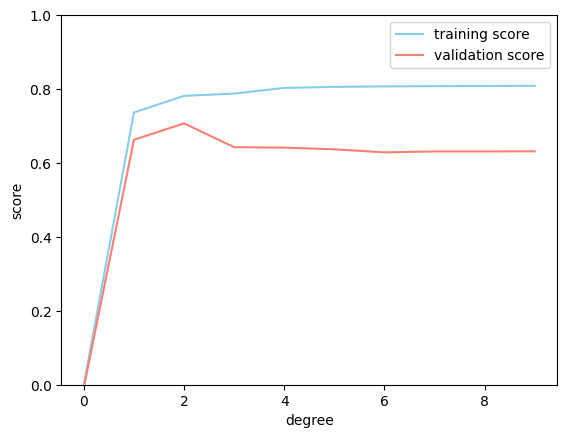

In [82]:
degree = np.arange(0, 10)

train_score, val_score = validation_curve(
    make_pipeline(PolynomialFeatures(degree, interaction_only=False),LinearRegression()), x, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=5)

plt.plot(degree, np.median(train_score, axis=1), color='skyblue', 
         label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='salmon', 
         label='validation score') 
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

better_degree = degree[np.argmax(np.median(val_score,axis=1))]
print(f'El mejor orden del polinomio es: {better_degree}')

El mejor orden del polinomio es 2

In [83]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
x_poly = poly.fit_transform(x)

model = LinearRegression()

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores1 = cross_val_score(model, x_poly, y, cv=kf, scoring='neg_root_mean_squared_error') 
scores = cross_val_score(model, x_poly, y, cv=kf, scoring='r2')

rmse_promedio_P = -np.mean(scores1)
R2_promedio_P = np.mean(scores)
print(f'Root Mean Squared Error promedio (RMSE): {rmse_promedio_P}')
print(f'Coef. de Determinación promedio (R^2): {R2_promedio_P}')

Root Mean Squared Error promedio (RMSE): 0.25085942380470605
Coef. de Determinación promedio (R^2): 0.7311146414174173


Regularización Lasso

In [84]:
alfa = np.logspace(-3,3,num=7)
modeloL= make_pipeline(PolynomialFeatures(degree=2, interaction_only=False), LassoCV(alphas=alfa,cv=5,max_iter=10000))

scores1L = cross_val_score(modeloL, x_poly, y, cv=kf, scoring='neg_root_mean_squared_error')
scoresL = cross_val_score(modeloL, x_poly, y, cv=kf, scoring='r2') 

rmse_promedio_PL = -np.mean(scores1L) 
R2_promedio_PL = np.mean(scoresL) 

print("Regularización Lasso")
print(f'Root Mean Squared Error promedio (RMSE) Lasso: {rmse_promedio_PL}')
print(f'Coef. de Determinación promedio (R^2) Lasso:{R2_promedio_PL}')
modeloL.fit(x_poly, y)
print("-"*20)
print("Coeficientes Lasso:", modeloL.coef_)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.891e-01, tolerance: 1.712e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e+01, tolerance: 1.712e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check 

KeyboardInterrupt: 

Si se aumentaban más las iteraciones no cargaba el programa. <br>
Se volvió a utilizar ***StandardScaler()*** 

In [85]:
modelo_lasso = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=False),
    StandardScaler(),
    LassoCV(alphas=alfa, cv=5, max_iter=50000)
)

modelo_lasso.fit(x_poly, y)

rmse_scores = cross_val_score(modelo_lasso, x_poly, y, cv=kf, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(modelo_lasso, x_poly, y, cv=kf, scoring='r2')

rmse_promedio_PLS = -np.mean(rmse_scores)
r2_promedio_PLS = np.mean(r2_scores)

print(f'RMSE promedio (Lasso): {rmse_promedio_PLS:.3f}')
print(f'R² promedio (Lasso): {r2_promedio_PLS:.3f}')

coeficientesL= modelo_lasso._final_estimator.coef_
print("Coeficientes Lasso:", coeficientesL)
coeficientes = modelo_lasso.named_steps['lassocv'].coef_
num_coef_cero = np.sum(coeficientes == 0)
print(f'Número de coeficientes iguales a cero: {num_coef_cero}')
num_coef_total = len(coeficientes)
print(f'Número total de coeficientes: {num_coef_total}')

RMSE promedio (Lasso): 0.254
R² promedio (Lasso): 0.726
Coeficientes Lasso: [ 0.          0.         -0.87771754 -0.05255576 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.0023444
 -0.00383115 -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.14996533  0.          0.
  0.221

### Prueba 4: Modelo Splines

Definir el mejor nudo

La mejor cantidad de nudos es : 0


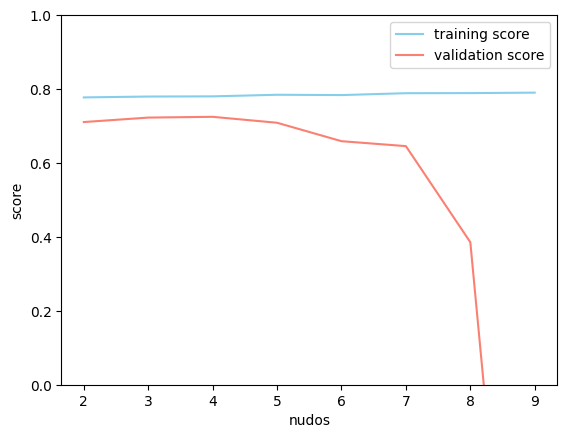

In [86]:
nudo = np.arange(0, 10)

train_score, val_score = validation_curve(
    make_pipeline(SplineTransformer(degree=2), LinearRegression()), x, y,
    param_name='splinetransformer__n_knots',
    param_range=nudo, cv=5)

plt.plot(nudo, np.median(train_score, axis=1), color='skyblue', 
         label='training score')
plt.plot(nudo, np.median(val_score, axis=1), color='salmon', 
         label='validation score') 
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('nudos')
plt.ylabel('score')

better_nudo = nudo[np.argmax(np.median(val_score,axis=1))]
print(f'La mejor cantidad de nudos es : {better_nudo}')

Se eligió la cantidad de nudos igual a 4 analizando la gráfica

In [87]:
spline_transformer = SplineTransformer(degree=2, n_knots=4)

X_splines = spline_transformer.fit_transform(x)
modelo_f = LinearRegression().fit(X_splines,y)

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores1 = cross_val_score(modelo_f, X_splines, y, cv=kf, scoring='neg_root_mean_squared_error') 
scores = cross_val_score(modelo_f, X_splines, y, cv=kf, scoring='r2')

rmse_promedio_S = -np.mean(scores1)
R2_promedio_S = np.mean(scores)
print(f'Root Mean Squared Error promedio (RMSE): {rmse_promedio_S}')
print(f'Coef. de Determinación promedio (R^2): {R2_promedio_S}')

Root Mean Squared Error promedio (RMSE): 0.2515819202890247
Coef. de Determinación promedio (R^2): 0.7326306445914442


Regularización Lasso

In [88]:
alfa = np.logspace(-3,3,num=7)
modeloSL= make_pipeline(SplineTransformer(degree=2), LassoCV(alphas=alfa, cv=5, max_iter=50000))

scores1L = cross_val_score(modeloSL, X_splines, y, cv=kf, scoring='neg_root_mean_squared_error')
scoresL = cross_val_score(modeloSL, X_splines, y, cv=kf, scoring='r2') 

rmse_promedio_SL = -np.mean(scores1L) 
R2_promedio_SL = np.mean(scoresL) 

print("Regularización Lasso")
print(f'Root Mean Squared Error promedio (RMSE) Lasso: {rmse_promedio_SL}')
print(f'Coef. de Determinación promedio (R^2) Lasso:{R2_promedio_SL}')
modeloSL.fit(X_splines, y)


coeficientesL= modeloSL._final_estimator.coef_
print("Coeficientes Lasso:", coeficientesL)
coeficientes = modeloSL.named_steps['lassocv'].coef_
num_coef_cero = np.sum(coeficientes == 0)
print(f'Número de coeficientes iguales a cero: {num_coef_cero}')
num_coef_total = len(coeficientes)
print(f'Número total de coeficientes: {num_coef_total}')

Regularización Lasso
Root Mean Squared Error promedio (RMSE) Lasso: 0.2512593855183159
Coef. de Determinación promedio (R^2) Lasso:0.7360209450252128
Coeficientes Lasso: [ 8.47952630e-01  6.31566909e-02 -1.58272908e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.30259022e+00  0.00000000e+00
  0.00000000e+00 -2.06878063e-01 -1.82442866e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -9.74993070e-01 -0.00000000e+00
 -0.00000000e+00  1.78908061e-01  9.69394626e-03  0.00000000e+00
 -1.47646172e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  

### Tabla de métricas de todos los modelos

Para poder elegir el mejor modelo

In [89]:
resultados = [
    {"Modelo": "Lineal múltiple", 
     "RMSE": rmse_promedio_LS, 
     "R²": R2_promedio_LS},

    {"Modelo": "Lasso (lineal)", 
     "RMSE": rmse_promedio_LSL, 
     "R²": R2_promedio_LSL},

    {"Modelo": "Lineal con interacciones", 
     "RMSE": rmse_promedio_LC, 
     "R²": R2_promedio_LC},

    {"Modelo": "Lasso con interacciones", 
     "RMSE": rmse_promedio_LCLS, 
     "R²": r2_promedio_LCLS},

    {"Modelo": "Polinomial", 
     "RMSE": rmse_promedio_P, 
     "R²": R2_promedio_P},

    {"Modelo": "Lasso polinomial", 
     "RMSE": rmse_promedio_PLS, 
     "R²": r2_promedio_PLS},

    {"Modelo": "Splines", 
     "RMSE": rmse_promedio_S, 
     "R²": R2_promedio_S},

    {"Modelo": "Lasso splines", 
     "RMSE": rmse_promedio_SL, 
     "R²": R2_promedio_SL},
]

tabla = pd.DataFrame(resultados)
styled = (
    tabla.style
    .apply(
        lambda fila: ['background-color: white; color: black'] * len(fila)
        if fila.name == 7 else [''] * len(fila),
        axis=1
    )
    .format({"RMSE": "{:.4f}", "R²": "{:.4f}"})
    .set_table_styles([

        {"selector": "th.col_heading.level0.col0",
         "props": [("background-color", "salmon"),
                   ("color", "white"),
                   ("font-weight", "bold")]},

        {"selector": "th.col_heading.level0.col1",
         "props": [("background-color", "skyblue"),
                   ("color", "black"),
                   ("font-weight", "bold")]},

        {"selector": "th.col_heading.level0.col2",
         "props": [("background-color", "skyblue"),
                   ("color", "black"),
                   ("font-weight", "bold")]},
    ])
)
styled

,Modelo,RMSE,R²
0,Lineal múltiple,0.2692,0.6944
1,Lasso (lineal),0.2689,0.6952
2,Lineal con interacciones,0.2497,0.7350
3,Lasso con interacciones,0.2555,0.7227
4,Polinomial,0.2509,0.7311
5,Lasso polinomial,0.2542,0.7256
6,Splines,0.2516,0.7326
7,Lasso splines,0.2513,0.7360


***

### Conclusión final

Seleccionamos el **modelo lineal con interacciones** como el mejor modelo. A pesar de que el modelo basado en splines con regularización Lasso obtuvo un desempeño ligeramente superior, con un R²=0.7360, su funcionamiento es considerablemente más complejo. En contraste, el modelo lineal con interacciones alcanzó un R²=0.7350, un valor prácticamente equivalente, pero mucho más simple, interpretable y fácil de implementar.
Por esta razón, priorizamos el modelo lineal con interacciones, ya que ofrece un buen equilibrio entre rendimiento y baja complejidad, manteniendo una precisión comparable mientras mantiene la interpretabilidad del modelo.

No se utilizó **curva de aprendizaje** para ningún modelo ya que no requerimos cambiar la cantidad de datos. No podemos aumentarlos y tampoco mejoraría al modelo bajarlos.

***

### Ecuación del modelo

\[
\begin{align*}
\mathbf{aveOralM} = & \; 309.6 \\
& - 16.5 \cdot \mathbf{T\_Max\_avg} \\
& + 16.47 \cdot \mathbf{canthiMax\_avg} \\
& - 18.02 \cdot \mathbf{canthi4Max\_avg} \\
& + 2.21 \cdot \mathbf{T\_RC\_Max\_avg} \\
& - 3.47 \cdot (\mathbf{T\_Max\_avg} \cdot \mathbf{canthiMax\_avg}) \\
& + 4.06 \cdot (\mathbf{T\_Max\_avg} \cdot \mathbf{canthi4Max\_avg}) \\
& - 0.10 \cdot (\mathbf{T\_Max\_avg} \cdot \mathbf{T\_RC\_Max\_avg}) \\
& - 0.30 \cdot (\mathbf{canthiMax\_avg} \cdot \mathbf{canthi4Max\_avg}) \\
& + 3.35 \cdot (\mathbf{canthiMax\_avg} \cdot \mathbf{T\_RC\_Max\_avg}) \\
& - 3.30 \cdot (\mathbf{canthi4Max\_avg} \cdot \mathbf{T\_RC\_Max\_avg})
\end{align*}
\]

***

# Parte 2: Clasificación (50%)

Cargar datos

In [90]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.drop(columns=["id","ever_married", "work_type", "Residence_type"], inplace=True)
df.head()


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1


Para columnas con NaN, reemplazamos el valor faltante por la media

In [91]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.head()


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,171.23,34.400000,smokes,1
4,Female,79.0,1,0,174.12,24.000000,never smoked,1


Gráfico de barras para observar la distribución de la clase stroke

stroke
0    4861
1     249
Name: count, dtype: int64


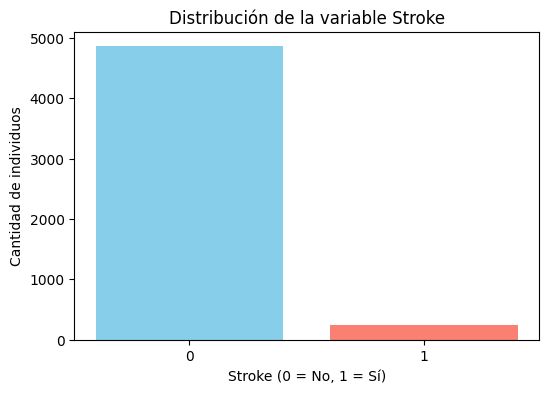

In [92]:
conteo = df["stroke"].value_counts()
print(conteo)

plt.figure(figsize=(6,4))
plt.bar(
    conteo.index.astype(str),
    conteo.values,
    color=["skyblue", "salmon"]  
)
plt.xlabel("Stroke (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de individuos")
plt.title("Distribución de la variable Stroke")
plt.show()

Al observar la distribución de la variable Stroke concluimos que es un problema de **clases raras** ya que nuestra clase de interés (clase 1) está en una proporción de 249/4841, alrededor del 5%, lo cual indica un **desbalance**.

Codificamos las variables categóricas

In [94]:
data_encoded = pd.get_dummies(df, columns=['gender', 'smoking_status'])
data_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,False,True,False,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,True,False,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,True,False,False,False,False,False,True
4,79.0,1,0,174.12,24.000000,1,True,False,False,False,False,True,False


Algoritmo de agrupamiento **KMeans**

Agregamos las y predichas en una nueva columna del DataFrame

In [95]:
x= data_encoded.drop(columns=['stroke'])
y= data_encoded['stroke']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled) 
data_encoded['KMeans']= y_kmeans
data_encoded.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,KMeans
0,67.0,0,1,228.69,36.600000,1,False,True,False,False,True,False,False,0
1,61.0,0,0,202.21,28.893237,1,True,False,False,False,False,True,False,0
2,80.0,0,1,105.92,32.500000,1,False,True,False,False,False,True,False,0
3,49.0,0,0,171.23,34.400000,1,True,False,False,False,False,False,True,0
4,79.0,1,0,174.12,24.000000,1,True,False,False,False,False,True,False,0


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      4861
           1       0.03      0.19      0.05       249

    accuracy                           0.67      5110
   macro avg       0.49      0.44      0.43      5110
weighted avg       0.90      0.67      0.76      5110



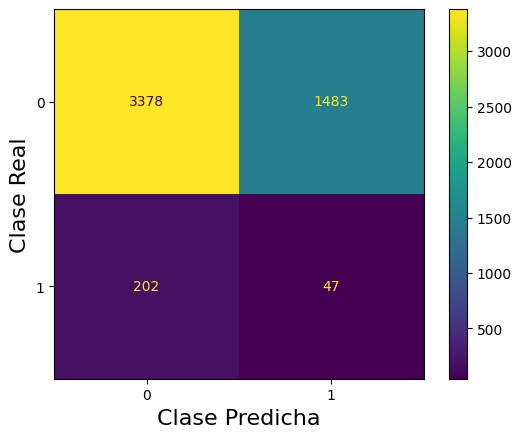

In [97]:
y_test= data_encoded['stroke']
y_pred= data_encoded['KMeans']


print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()

**Análisis**

La matriz de confusión muestra que el modelo tiene un desempeño moderado para la clase 0 (recall = 0.69), pero mantiene un rendimiento muy bajo para la clase 1 (recall = 0.19), la clase minoritaria. Esto significa que se están dejando muchos casos de pacientes que sí tienen **riesgo de ACV** , lo cual es riesgoso para el paciente. 

Es importante resaltar que el algoritmo K-means, al no depender de etiquetas sino de la distribución de los datos, no se ve afectado por el desbalance. Esto hace que separe los grupos según su estructura interna y clasifique considerablemente bien la clase 0, ya que es la más numerosa. Por otro lado, la clase 1 al ser la clase minoritaria y tener menos datos se generan muchos más errores durante la clasificación.

La **característica** creada por KMeans **no** es útil debido a lo que explicamos anteriormente.

Algoritmo **KNN**

Realizamos una curva de validación para escoger el mejor valor de k

El mejor valor de K es: 1


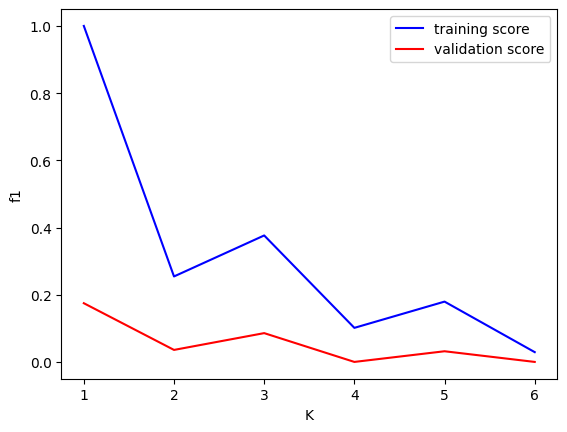

In [98]:
k = np.arange(1, 7) 
modelo1= KNeighborsClassifier(metric='euclidean')
train_score, val_score = validation_curve(modelo1,x, y,
                                          param_name='n_neighbors',scoring='f1',
                                          param_range=k, cv=5)

plt.plot(k, np.median(train_score, axis=1), color='blue', 
         label='training score') 

plt.plot(k, np.median(val_score, axis=1), color='red', 
         label='validation score') 
plt.legend(loc='best')
plt.xlabel('K')
plt.ylabel('f1')

better_K = k[np.argmax(np.median(val_score,axis=1))] 

print(f'El mejor valor de K es: {better_K}')

Aunque el mejor k dice que es 1, escogemos 5 debido a que de escoger el 1, el modelo sufriría un sobreajuste.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5,random_state=10)
knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train, y_train)



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [100]:
y_pred = knn.predict(X_test)
probs = knn.predict_proba(X_scaled)[:, 1]

df["KNN"] = probs


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2417
           1       0.12      0.01      0.01       138

    accuracy                           0.94      2555
   macro avg       0.54      0.50      0.49      2555
weighted avg       0.90      0.94      0.92      2555



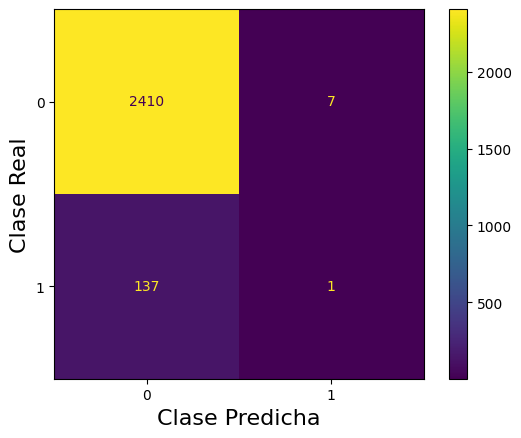

In [102]:
print("Reporte de clasificación:")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()

**Análisis**

La matriz de confusión mostró que para la clase 0 (personas que no tienen riesgo ACV) el modelo realizó una clasificación adecuada. Sin embargo, para la clase 1 (personas con riesgo de ACV), que además es la clase minoritaria, la clasificación fue muy deficiente. Esto se evidencia en el recall de la clase 1, que fue apenas 0.01, indicando que el modelo prácticamente no logró identificar correctamente a los pacientes que realmente presentan riesgo de ACV.

Este resultado es altamente peligroso, ya que implica que personas que sí tienen riesgo de ACV están siendo clasificadas como si no lo tuvieran, lo que podría impedirles recibir atención y tratamiento. Este comportamiento se debe al gran desbalance entre las clases: al haber muy pocos casos de clase 1, el modelo aprende a predecir casi siempre la clase 0. Además, este problema no se soluciona simplemente escalando los datos, ya que la raíz del problema es la distribución desigual de las clases, no la magnitud de las variables.

Se recomienda cambiar el umbral, rebalancear la clase o cambiar el modelo para obtener un mejor resultado en las predicciones.

La **característica** creada por KNN es considerablemente útil debido a que nos da la propbabilidad de pertenecer a la clase 1. Sin embargo, no la utilizaremos ya que no obtuvo buenas métricas.

Vamos a cambiar el umbral para evaluar la posibilidad de un mejor modelo

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4861
           1       0.30      0.20      0.24       249

    accuracy                           0.94      5110
   macro avg       0.63      0.59      0.60      5110
weighted avg       0.93      0.94      0.93      5110



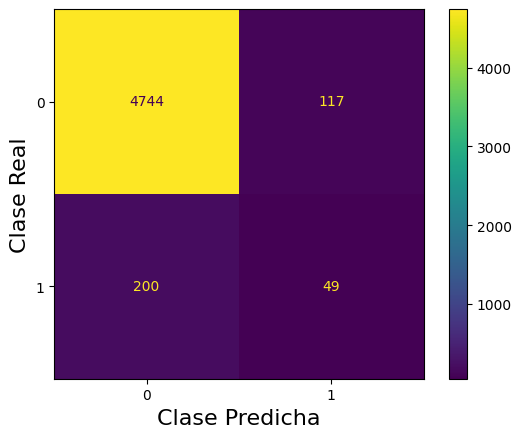

In [103]:
preds1 = (probs > 0.3).astype(int)

print("Reporte de clasificación:")
print(classification_report(y, preds1))
conf_matrix = confusion_matrix(y, preds1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()


El recall obtenido con el modelo al modificar el umbral sigue siendo muy bajo, por tanto, no es un buen modelo. 
La característica que brinda no es de utilidad.

No se utilizarán las características creadas debido a que se determinó que no serían de utilidad para el modelo.

**Árbol de decisión**

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2417
           1       0.17      0.14      0.15       138

    accuracy                           0.91      2555
   macro avg       0.56      0.55      0.55      2555
weighted avg       0.91      0.91      0.91      2555



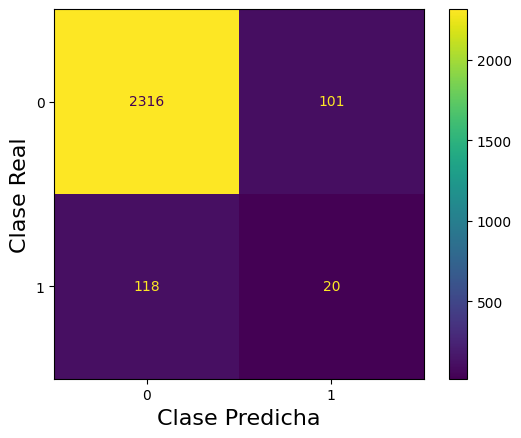

In [104]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred =tree.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()

**Random Forest**

Curva de validación para obtener el mejor número de árboles

El mejor número de árboles es: 5


Text(0, 0.5, 'Score')

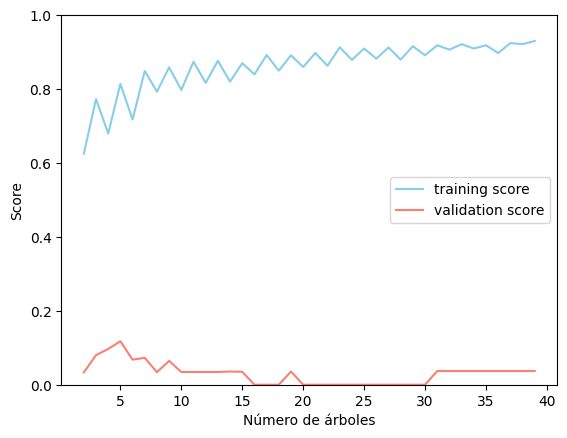

In [105]:
num = np.arange(2, 40, 1)

train_score, val_score = validation_curve(
    RandomForestClassifier(n_estimators=num, 
                           random_state=0, max_samples=0.8),  x, y,
    param_name='n_estimators',
    param_range=num,scoring = 'f1', cv=5)

better_num = num[np.argmax(np.median(val_score,axis=1))]
print(f'El mejor número de árboles es: {better_num}')
                                          

plt.plot(num, np.median(train_score, axis=1), color='skyblue', 
         label='training score')
plt.plot(num, np.median(val_score, axis=1), color='salmon', 
         label='validation score') 
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Número de árboles')
plt.ylabel('Score')

Escogimos 5 como el mejor número de árboles

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2417
           1       0.21      0.04      0.07       138

    accuracy                           0.94      2555
   macro avg       0.58      0.52      0.52      2555
weighted avg       0.91      0.94      0.92      2555



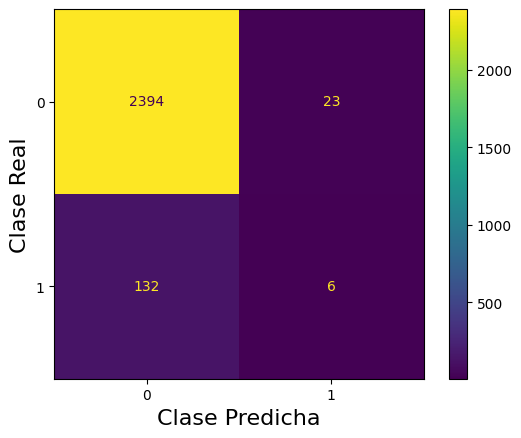

In [106]:
model = RandomForestClassifier(n_estimators=5, random_state=0, max_samples=0.8).fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()

**Máquina de Soporte Vectorial**

In [107]:
c = np.logspace(0,1.5, 8)

train_score, val_score = validation_curve(
    SVC(kernel='rbf', C=c,class_weight='balanced'),  x, y,
    param_name='C',
    param_range=c,scoring = 'f1', cv=5)

better_c = c[np.argmax(np.median(val_score,axis=1))]
print(f'El mejor valor de C es: {better_c}')

El mejor valor de C es: 19.306977288832496


Text(0, 0.5, 'score')

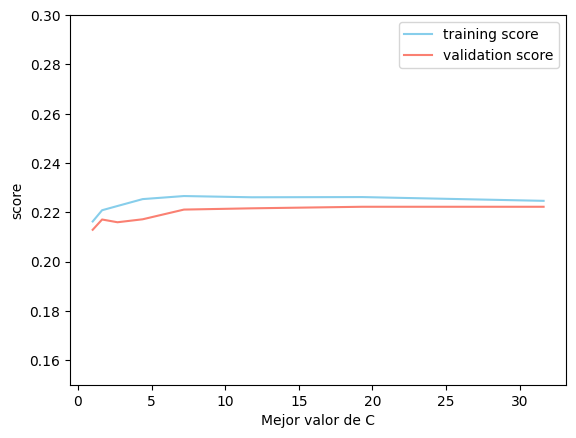

In [108]:
plt.plot(c, np.median(train_score, axis=1), color='skyblue', 
         label='training score')
plt.plot(c, np.median(val_score, axis=1), color='salmon', 
         label='validation score') 
plt.legend(loc='best')
plt.ylim(0.15, 0.3)
plt.xlabel('Mejor valor de C')
plt.ylabel('score')

Aunque el programa arrojó 19 como el valor óptimo de C, al analizar la gráfica se seleccionó C = 7 como el valor más adecuado. Esto se debe a que, al incrementar C, el modelo se vuelve más flexible y aumenta su complejidad, lo que puede conducir a un sobreajuste. En cambio, con C = 7 se obtiene un modelo más simple siguiendo el **Principio de Parsimonia**

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      2417
           1       0.13      0.57      0.21       138

    accuracy                           0.77      2555
   macro avg       0.55      0.67      0.54      2555
weighted avg       0.92      0.77      0.83      2555



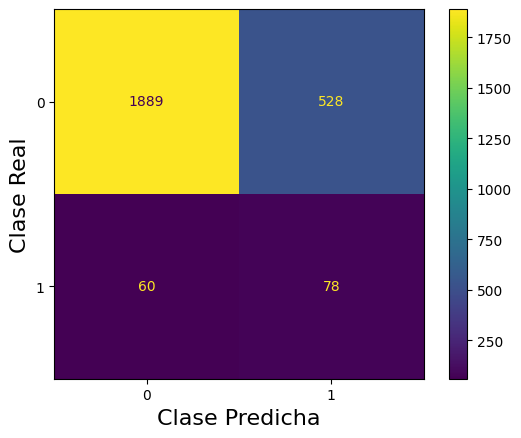

In [109]:
model = SVC(kernel='rbf', C=4,class_weight='balanced').fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()

Algoritmo **Naive Bayes**

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2417
           1       0.17      0.36      0.23       138

    accuracy                           0.87      2555
   macro avg       0.56      0.63      0.58      2555
weighted avg       0.92      0.87      0.89      2555



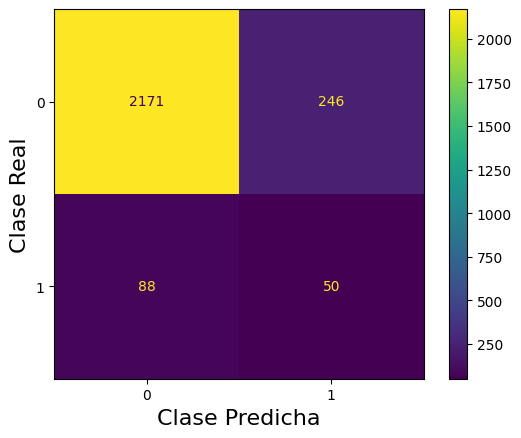

In [110]:
model = GaussianNB().fit(X_train,y_train) 
y_new = model.predict(X_test)
probs = model.predict_proba(X_test)
probs = probs.round(3)

print("Reporte de clasificación:")
print(classification_report(y_test, y_new))
conf_matrix = confusion_matrix(y_test, y_new)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()

Vamos a evaluar si al cambiar el umbral el modelo mejora en sus predicciones de la clase minoritaria.

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2417
           1       0.16      0.39      0.22       138

    accuracy                           0.85      2555
   macro avg       0.56      0.63      0.57      2555
weighted avg       0.92      0.85      0.88      2555



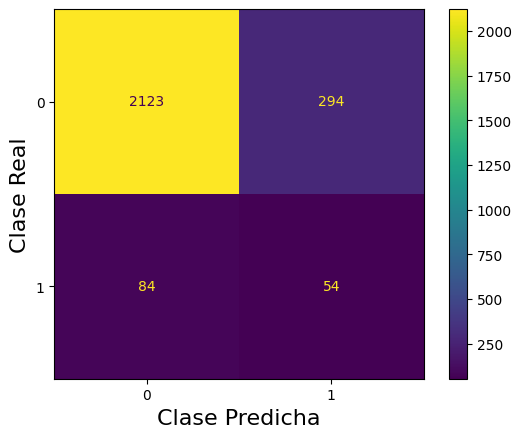

In [111]:
preds = (probs > 0.3).astype(int)

print("Reporte de clasificación:")
print(classification_report(y_test, preds[:,1]))
conf_matrix = confusion_matrix(y_test, preds[:,1])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()


Al modificar el umbral no se mejoró considerablemente el desempeño del modelo.

Regresión **Logística**

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2417
           1       1.00      0.01      0.01       138

    accuracy                           0.95      2555
   macro avg       0.97      0.50      0.49      2555
weighted avg       0.95      0.95      0.92      2555



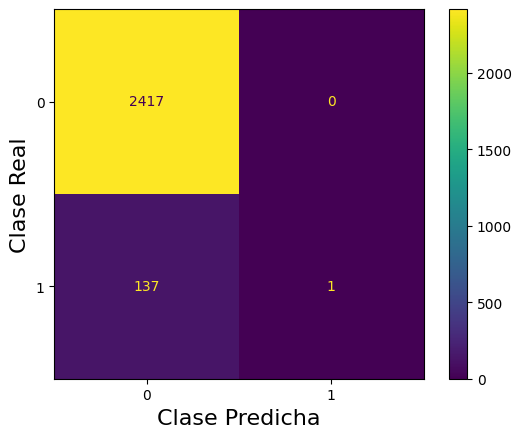

In [112]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()

**Discriminante de Fisher**

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2417
           1       0.23      0.09      0.13       138

    accuracy                           0.93      2555
   macro avg       0.59      0.54      0.55      2555
weighted avg       0.91      0.93      0.92      2555



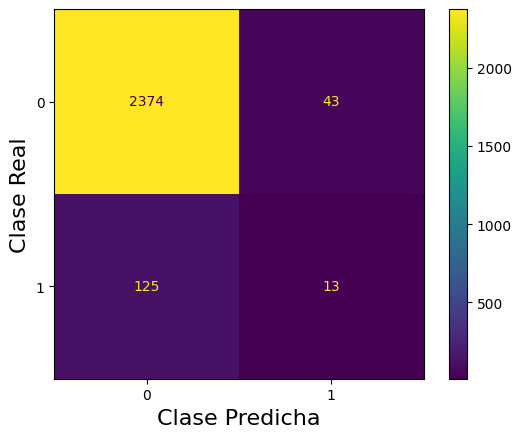

In [113]:
model_fisher = LinearDiscriminantAnalysis()
model_fisher.fit(X_train, y_train)

y_pred = model_fisher.predict(X_test)
probs = model_fisher.predict_proba(X_test)[:, 1]

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2417
           1       0.20      0.26      0.23       138

    accuracy                           0.90      2555
   macro avg       0.58      0.60      0.59      2555
weighted avg       0.92      0.90      0.91      2555



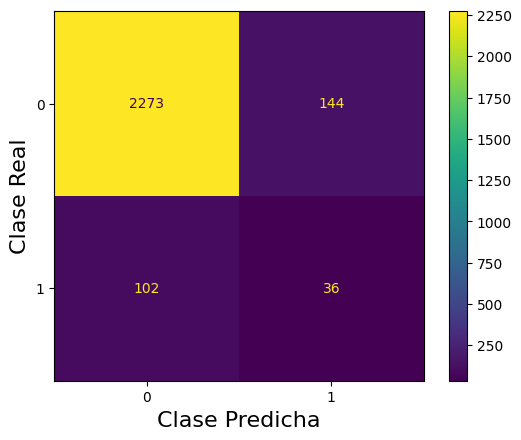

In [114]:
preds = (probs > 0.3).astype(int)

print("Reporte de clasificación:")
print(classification_report(y_test, preds))
conf_matrix = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()

### Tabla de métricas de todos los modelos

In [ ]:
resultados = [
    {"Modelo": "K-Means (0.19)", "Recall": 0.19},
    {"Modelo": "KNN (0.30)", "Recall": 0.20},
    {"Modelo": "Árbol", "Recall": 0.17},
    {"Modelo": "Random Forest", "Recall": 0.04},
    {"Modelo": "Máquina de Soporte", "Recall": 0.57},
    {"Modelo": "Naive Bayes (0.30)", "Recall": 0.39},
    {"Modelo": "Regresión Logística", "Recall": 0.01},
    {"Modelo": "Discriminante de Fisher (0.30)", "Recall": 0.26},
]

tabla = pd.DataFrame(resultados)
mayor_valor = -1
indice_mayor = -1
for i in range(len(tabla)):
    if tabla.loc[i, "Recall"] > mayor_valor:
        mayor_valor = tabla.loc[i, "Recall"]
        indice_mayor = i

styled = (
    tabla.style
    .apply(
        lambda fila: ['background-color: white; color: black'] * len(fila)
        if fila.name == indice_mayor else [''] * len(fila),
        axis=1
    )
    .format({"Recall": "{:.4f}"})
    .set_table_styles([

        {"selector": "th.col_heading.level0.col0",
         "props": [("background-color", "salmon"),
                   ("color", "white"),
                   ("font-weight", "bold")]},

        {"selector": "th.col_heading.level0.col1",
         "props": [("background-color", "skyblue"),
                   ("color", "black"),
                   ("font-weight", "bold")]},
    ])
)

styled


,Modelo,Recall
0,K-Means (0.19),0.1900
1,KNN (0.30),0.2000
2,Árbol,0.1700
3,Random Forest,0.0400
4,Máquina de Soporte,0.5700
5,Naive Bayes (0.30),0.3900
6,Regresión Logística,0.0100
7,Discriminante de Fisher (0.30),0.2600


**Análisis**



Utilizamos el **recall** como principal parámetro para la validación del modelo, ya que mide la proporción de verdaderos positivos (VP) en relación con los falsos negativos (FN). En este caso, es fundamental minimizar la cantidad de FN, de la mejor forma a cero, pues sería muy riesgoso clasificar a una persona como sin riesgo de ACV cuando en realidad sí lo presenta. Dado que la clase está desbalanceada, los algoritmos en general tienden a predecir casi todo como negativo, lo cual puede mantener una precisión aceptable pero deja el recall casi en cero. Por eso, el recall es la métrica que realmente muestra si un modelo está detectando los casos que importan.

Dentro de este contexto, la **Máquina de Soporte Vectorial** es claramente superior con un recall de **0.57** porque puede separar mejor los datos cuando la clase positiva es escasa. Por otro lado, Naive Bayes (0.39) y el Discriminante de Fisher (0.26) también ofrecen resultados útiles, ya que sus supuestos estadísticos permiten capturar patrones de la clase positiva incluso con pocos datos. En cambio, K-Means, KNN y los árboles no logran clasificar correctamente la clase 1. De igual forma, Random Forest y la Regresión Logística prácticamente no detectan positivos, probablemente debido al desbalance y a su tendencia de favorecer la clase mayoritaria.

En conclusión, escogimos la **Maquina de Soporte Vectorial** de entre los algoritmos evaluados debido a su mayor capacidad para clasificar la clase minoritoria, nuestra clase de interés.